In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib as mpl
COLOR = 'white'
mpl.rcParams['text.color'] = "black"
mpl.rcParams['axes.labelcolor'] = COLOR
mpl.rcParams['xtick.color'] = COLOR
mpl.rcParams['ytick.color'] = COLOR

MC Run

In [2]:
from plotting.plot_funcs import plot_cluster

# logger! 

#plot_cluster(exp.df, "cluster", title="True Clusters")

In [1]:
import pickle
with open('saved_runs/df_scores_221118.pickle', 'rb') as handle:
    df_scores = pickle.load(handle)
with open('saved_runs/MC_run_221118_v2.pickle', 'rb') as handle:
    results_mc = pickle.load(handle)
df_results, model_data = results_mc["df_results"], results_mc["model_data"]

In [4]:
from mc_simulation.after_processing import process_run_results2

df_total = process_run_results2(run_results, run_data)
df_total = df_total[df_total.dataset!=65]

OPTICS


66it [00:58,  1.13it/s]


random_inside


65it [01:24,  1.30s/it]


In [5]:
df_total

,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,...,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,8,16,0.471145,-67.533587,75.533587,85.706766,79.782950,0.465293,387.794836,2,...,1,1,6,1,1.000000,1,OPTICS,0,2,2.0
1,11,17,0.146458,-67.533689,75.533689,85.706868,79.783055,0.465293,387.794836,2,...,1,1,10,2,0.999999,2,OPTICS,0,2,2.0
2,9,29,0.479865,-67.534046,75.534046,85.707225,79.783423,0.465293,387.794836,2,...,1,1,14,3,0.999995,3,OPTICS,0,2,2.0
3,10,33,0.200122,-67.534165,75.534165,85.707344,79.783544,0.465293,387.794836,2,...,1,1,18,4,0.999994,4,OPTICS,0,2,2.0
4,6,30,0.498867,-67.534173,75.534173,85.707352,79.783552,0.465293,387.794836,2,...,1,1,22,5,0.999994,5,OPTICS,0,2,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,60,43,4.229331,-688.755533,716.755533,766.111874,726.400749,-0.037631,78.971615,7,...,33,40,345,55,0.131375,66,random_inside,64,5,1.0
66,69,46,3.866123,-676.981635,704.981635,754.337976,708.683395,-0.167400,77.434016,7,...,45,41,348,56,0.130495,67,random_inside,64,5,1.0
67,56,7,0.591423,-684.373546,708.373546,750.678981,710.393029,-0.216570,35.419310,6,...,47,46,358,57,0.107197,68,random_inside,64,5,1.0
68,63,72,4.180724,-695.085420,723.085420,772.441761,732.881312,-0.151151,81.956041,7,...,44,38,358,57,0.076056,69,random_inside,64,5,1.0


In [6]:
run_results["OPTICS"]['init_params'][0]

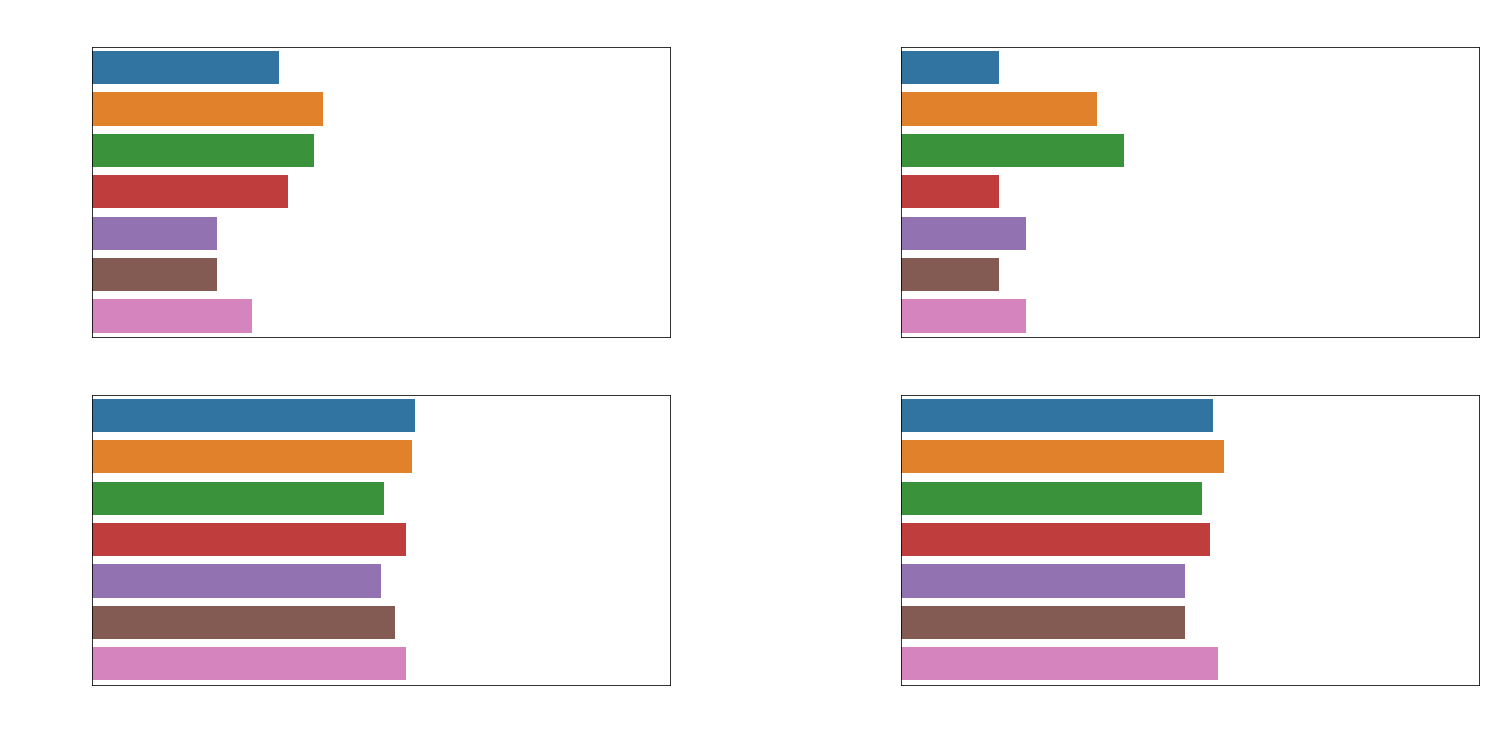

In [7]:
import seaborn as sns
from plotting.mc_simulation.criteria_performance import add_score_performance_plot, add_score_performance_plot_identified
from plotting.mc_simulation.init_performance import add_init_rout_performance_plot#, add_init_rout_performance_plot_identified

settings = {
    "ax_title_size": 18,
    "axis_label_size": 18
}

fig, axs = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(20, 10)
fig.suptitle("Analysis of MC-Run", color="white", size=30)
fig.tight_layout()
plt.subplots_adjust(hspace=0.2, wspace=0.4)
add_score_performance_plot(df_total, axs[0,0], settings, "OPTICS")
add_score_performance_plot(df_total, axs[0,1], settings, "random_inside")
add_score_performance_plot_identified(df_total, axs[1,0], settings, "OPTICS")
add_score_performance_plot_identified(df_total, axs[1,1], settings, "random_inside")

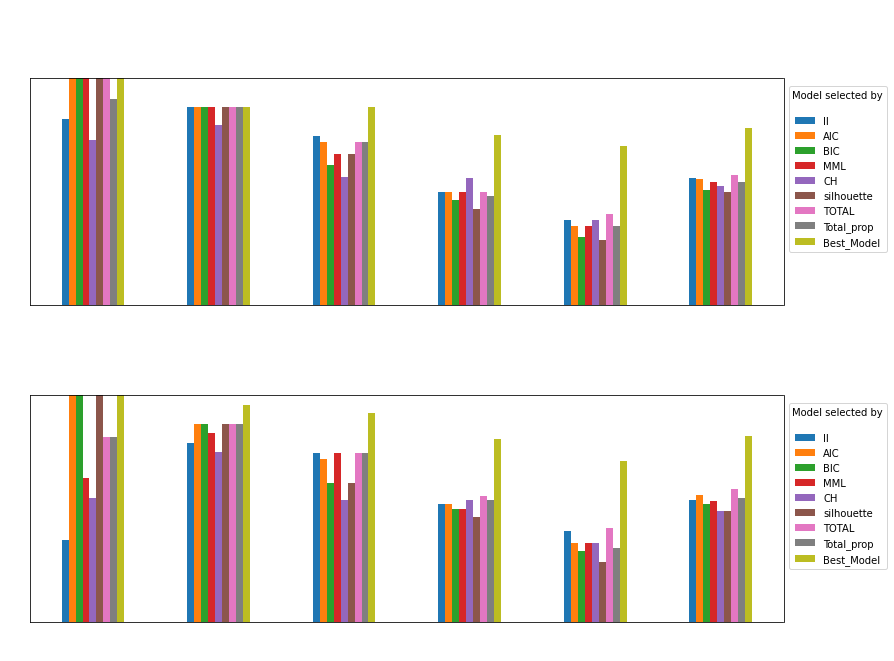

In [8]:
from plotting.mc_simulation.criteria.plot import plot_comparison_criteria
settings = {
    "sup_title_size": 25
}
fig, data = plot_comparison_criteria(df_total, settings)
fig

In [ ]:
from plotting.mc_simulation.comparison_init_rout_best_model.plot import plot_init_routine_comparison_best_models
plot_init_routine_comparison_best_models(data)

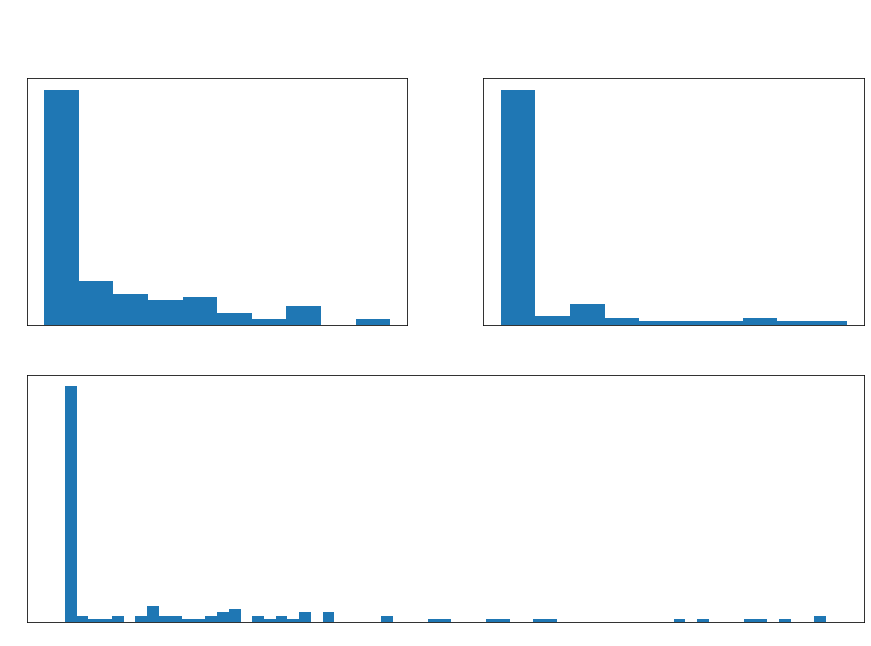

In [9]:
from plotting.mc_simulation.best_model_position.plot import plot_ranks_of_best_model
rank = "TOTAL_rank"
N_experiments, N_runs_per_clusternumber = 65, 10
#TODO CH_rank has best intra but worst inter rank profile -> more research
plot_ranks_of_best_model(df_total, rank, N_experiments, N_runs_per_clusternumber)#, init_routine="random_inside")
    

In [10]:
pd.set_option('display.max_columns', None)
#cols = [ 'param_index', 'll', 'AIC', 'BIC', 'silhouette', 'll_rank', 'AIC_rank', 'BIC_rank',"TOTAL_rank", 'silhouette_rank',"CH_rank", 'identified_cluster', "N_cluster",'True_Cluster_number']
dataset = 33
init_routine = "random_inside"
criterion = "TOTAL_rank"

df_select = df_total.loc[(df_total.dataset == dataset) & (df_total.init_routine == init_routine),:].sort_values(criterion)
#df_select = df_select[df_select.identified_cluster == df_select.identified_cluster.max()]
print(f"best model: {int(df_select.identified_cluster.max())} identified clusters")
df_select.head(50)


best model: 3 identified clusters


,param_index,iter_steps,execution_time,ll,AIC,BIC,MML,silhouette,CH,N_cluster,ll_rank,AIC_rank,BIC_rank,MML_rank,silhouette_rank,CH_rank,TOTAL_score,TOTAL_rank,Total_score_prop,Total_prop_rank,init_routine,dataset,True_Cluster_number,identified_cluster
0,19,19,0.235340,-357.880956,365.880956,379.269386,371.359599,0.130529,17.988693,2,1,1,1,1,15,49,68,1,0.961545,1,random_inside,33,4,0.0
1,12,17,0.298025,-357.890747,365.890747,379.279177,371.376318,0.130529,17.988693,2,2,2,2,2,15,49,72,2,0.961514,2,random_inside,33,4,0.0
4,14,262,0.856009,-403.995630,411.995630,425.384060,419.811559,0.164897,51.292406,2,16,14,13,14,11,23,91,3,0.853574,5,random_inside,33,4,1.0
5,16,271,1.155326,-403.995726,411.995726,425.384156,419.811659,0.164897,51.292406,2,17,15,14,15,11,23,95,4,0.853573,6,random_inside,33,4,1.0
6,18,240,0.802365,-403.995744,411.995744,425.384174,419.811676,0.164897,51.292406,2,18,16,15,16,11,23,99,5,0.853573,7,random_inside,33,4,1.0
7,13,272,0.911688,-403.995821,411.995821,425.384251,419.811756,0.164897,51.292406,2,19,17,16,17,11,23,103,6,0.853573,8,random_inside,33,4,1.0
2,23,26,0.448739,-401.419181,413.419181,433.501827,422.666962,0.189636,56.334251,3,14,22,22,22,4,20,104,7,0.860320,3,random_inside,33,4,3.0
3,21,113,1.645633,-403.470767,415.470767,435.553412,424.762509,0.191215,57.144055,3,15,23,23,23,3,19,106,8,0.855583,4,random_inside,33,4,3.0
8,17,264,1.025338,-403.995822,411.995822,425.384252,419.811757,0.164897,51.292406,2,20,18,17,18,11,23,107,9,0.853573,9,random_inside,33,4,1.0
12,4,2,0.041727,-378.910410,382.910410,389.604625,388.565912,0.000000,0.000000,1,3,3,3,3,44,53,109,10,0.849768,13,random_inside,33,4,0.0


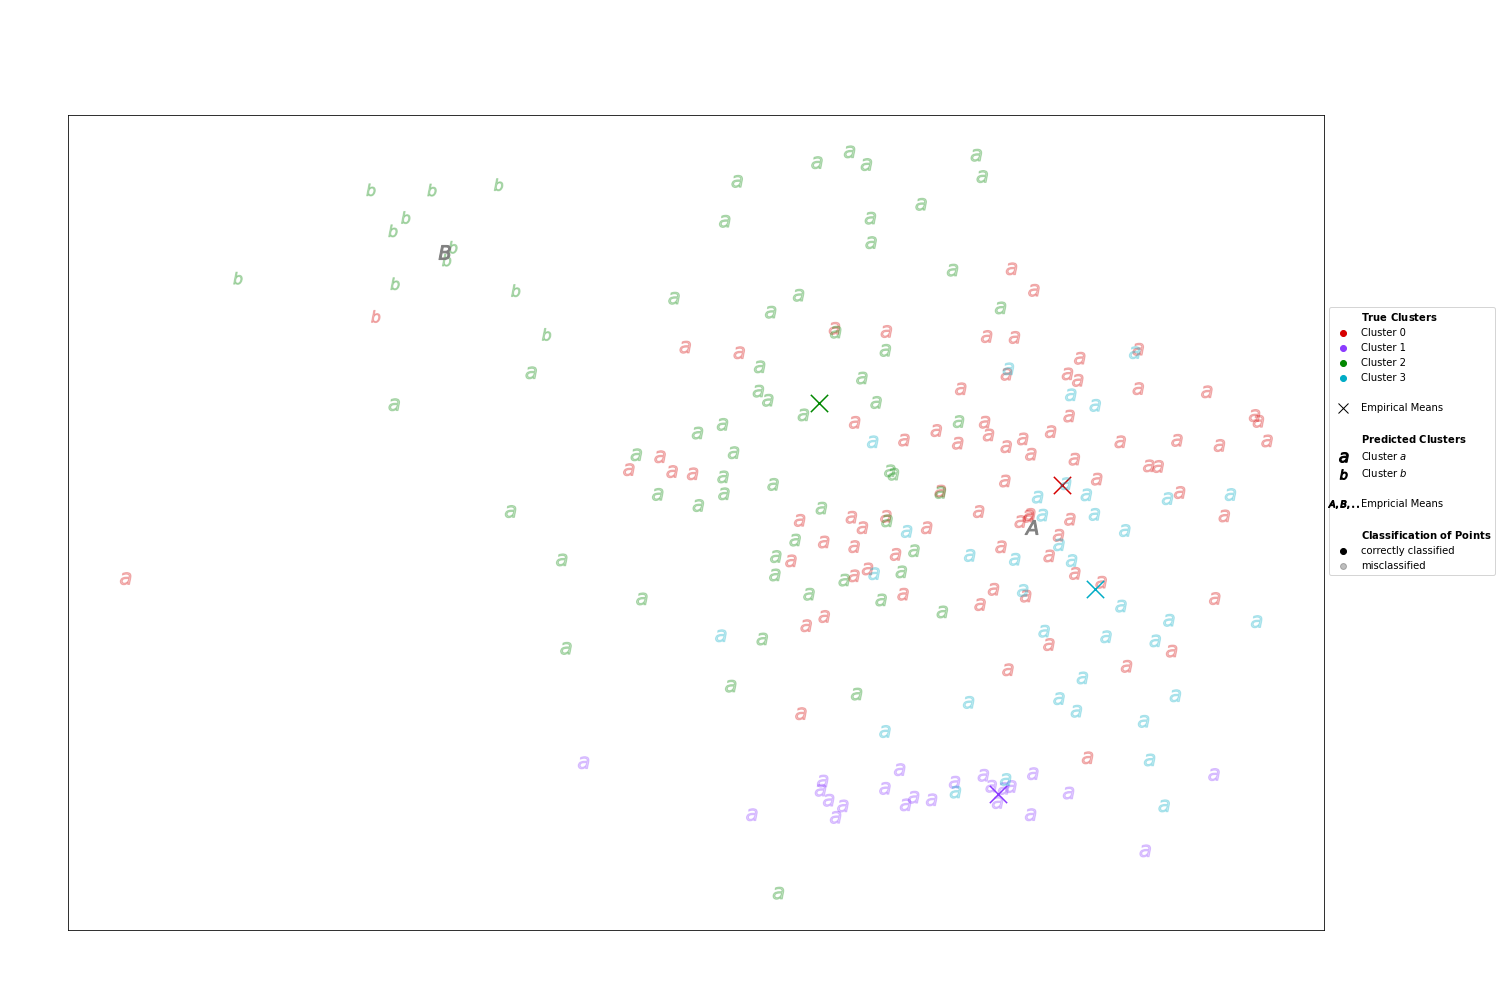

In [33]:
from plotting.clustering_assessment.plot import plot_clustering_assessment
param_idx = 19
#criterion = "TOTAL_rank"

plot_clustering_assessment(run_data, run_results, init_routine, dataset, criterion, param_idx=param_idx)

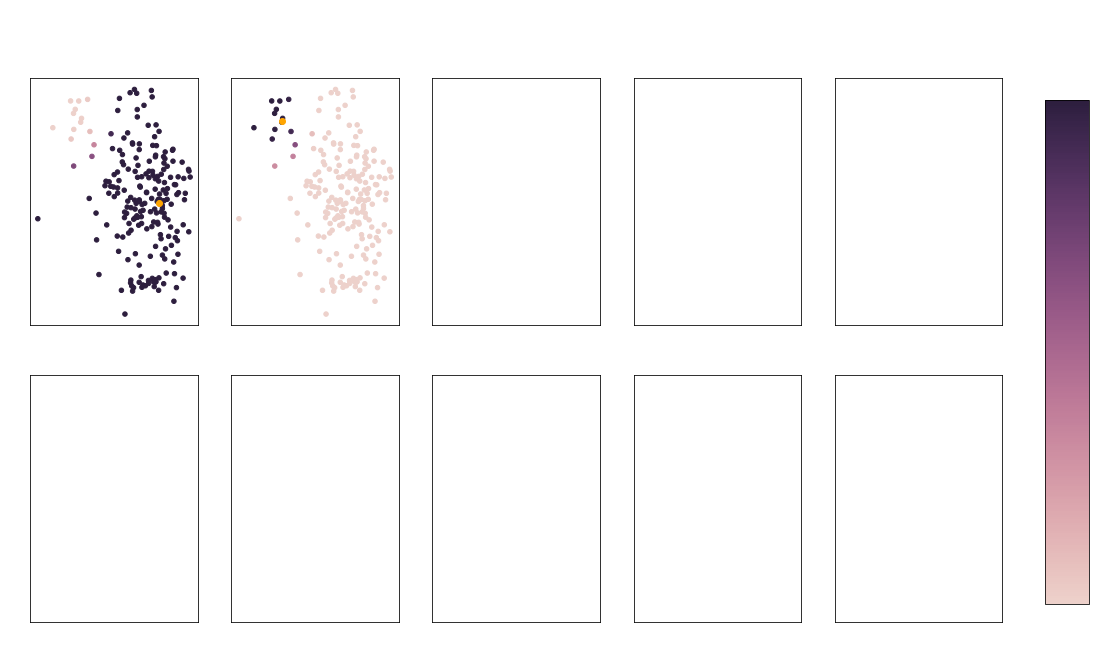

In [32]:
from plotting.plot_funcs import plot_responsibilities

plot_responsibilities(run_data[dataset], run_results[init_routine]["em_results"][dataset][param_idx]) 